# Rainfall Prediction

Problem Statement

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

# Task1

Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow

# Task2

Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Columns in the Dataset

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df=pd.read_csv('Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
pd. set_option('display.max_columns',None)

In [4]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains both categorical and numerical data. Many columns seem to have 'Nan' as value which needs to be handled before training the model

In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
#check For Unique Values
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Check For Null Values

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

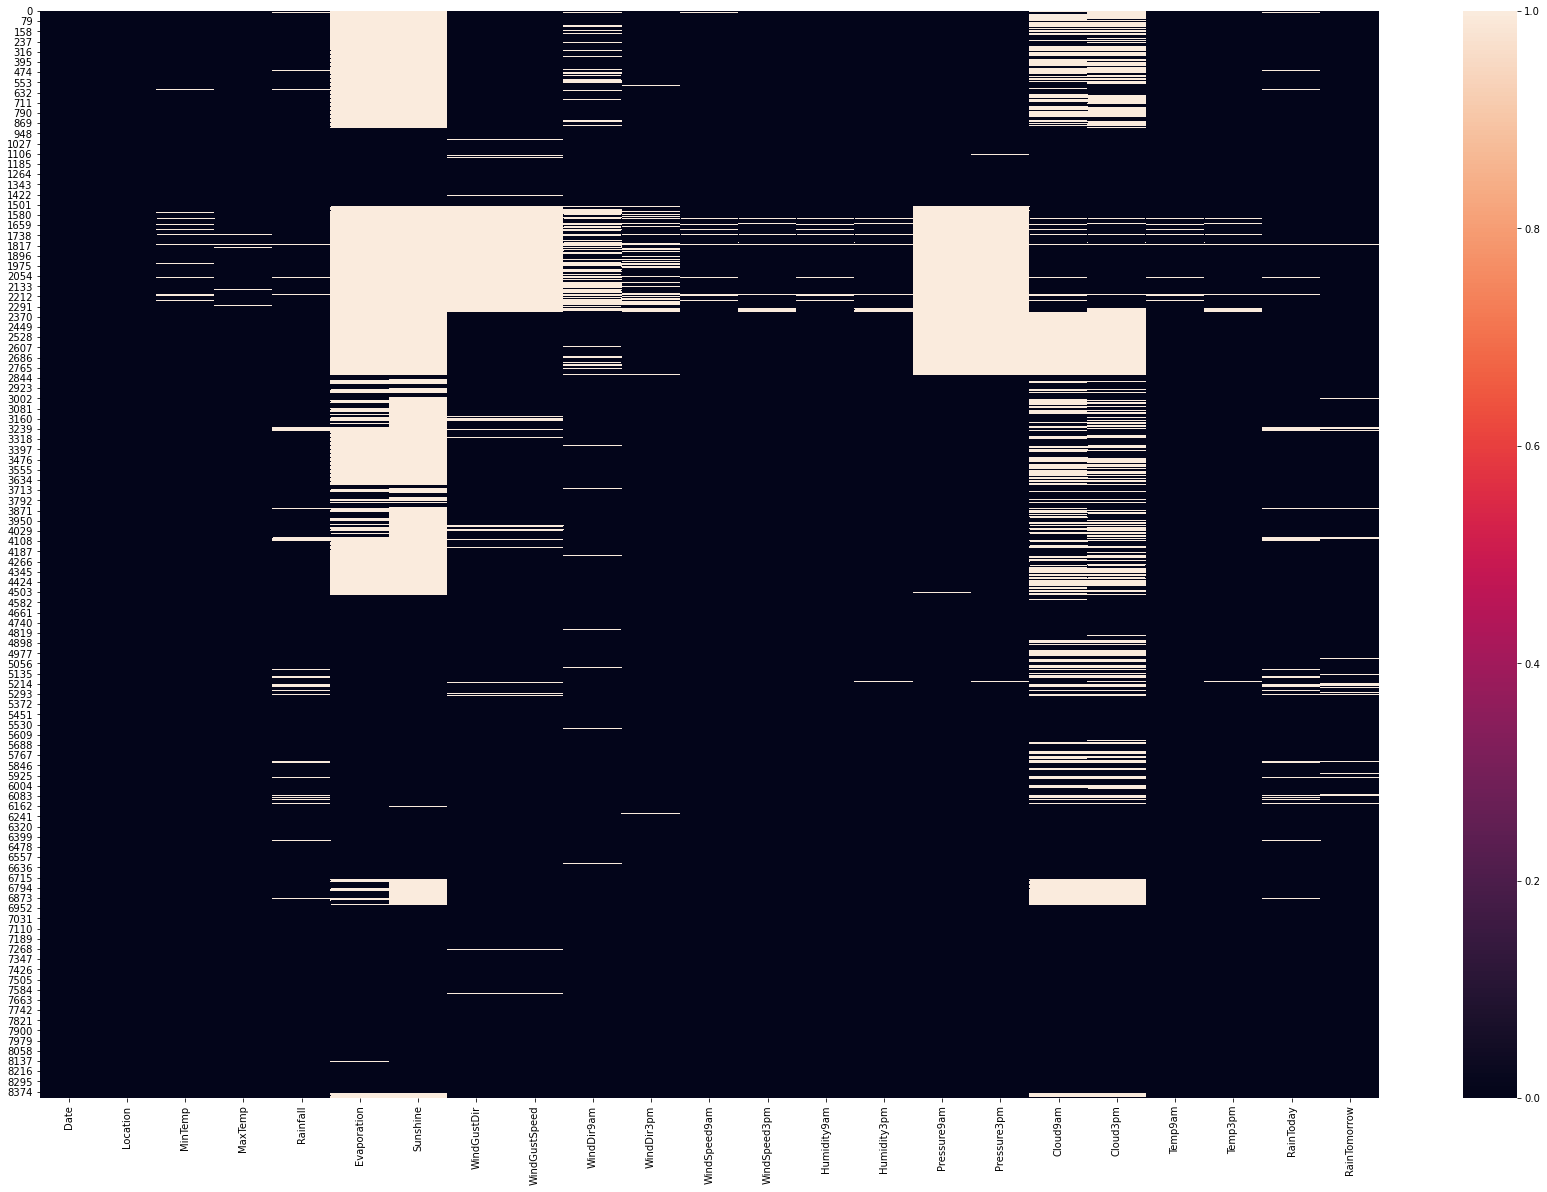

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isnull())

Almost all columns have nan values, So we shall handle it before further processing

In [12]:
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
num_columns= [x for x in df.dtypes.index if df.dtypes[x]== 'float64']
num_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
# We shall replace categorical columns with mode
for i in cat_columns:
    df[i]= df[i].fillna(df[i].mode()[0])

In [15]:
#We shall fill the numerical values with mean since all the columns are of float type
for i in num_columns:
    df[i]= df[i].fillna(df[i].mean())

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now the dataset is free from null values. So we shall proceed with further analysis.

In [17]:
# checking the values of each categorical columns
for i in cat_columns:
    print(i,"\n",df[i].value_counts(),"\n")
    print('*' * 100)

Date 
 2011-06-16    5
2011-02-20    5
2011-02-26    5
2011-02-18    5
2011-05-18    5
             ..
2013-03-18    1
2013-03-30    1
2013-05-19    1
2013-05-28    1
2013-06-02    1
Name: Date, Length: 3004, dtype: int64 

****************************************************************************************************
Location 
 Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 

****************************************************************************************************
WindGustDir 
 N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64 

****************************************

In [18]:
#Date column here is object type, but it has to be converted to converted to datetime 
df['Date']= pd.to_datetime(df['Date'])
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [19]:
#So dropping Date column
df.drop(['Date'], axis=1, inplace=True)

# Visualization

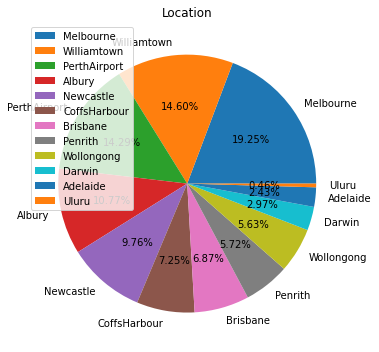

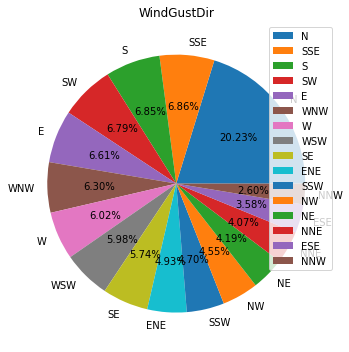

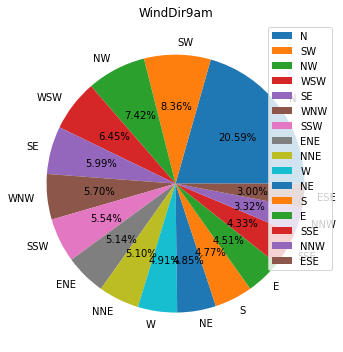

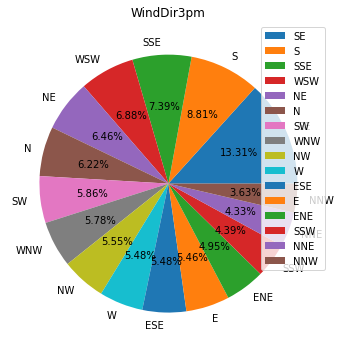

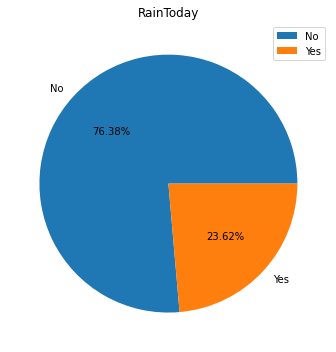

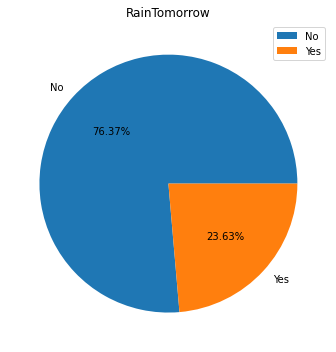

In [20]:
for i in cat_columns[1:]:
    plt.figure(figsize=(10,5))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.2f%%')
    plt.legend(prop={'size':10})
    plt.title(i)
    plt.tight_layout()
    plt.show()

Observation:
    
    *With respect to location of weather station, Melbourne records highest number of weather station with 19.45% where as Uluru records the lowest 0.46%.
    
    *The direction of the strongest wind gust in the 24 hours to midnight is highest with North direction.
    
    *Also Direction of the wind at 9am is high with North direction only.
    
    *Direction of the wind at 3pm is high with SouthEast direction.
    
    *Possibility of rain(Yes) today and tomorrow is low.

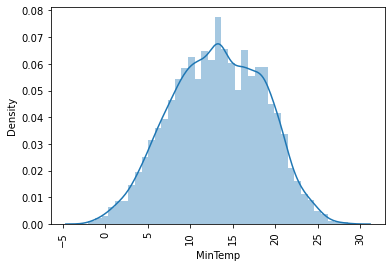

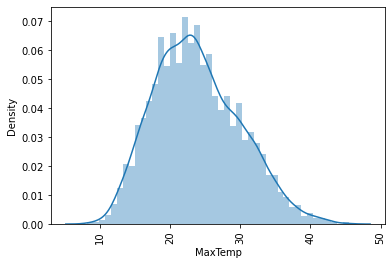

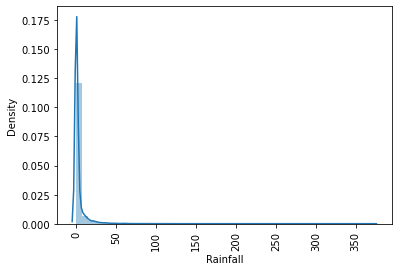

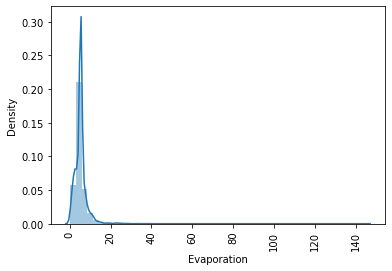

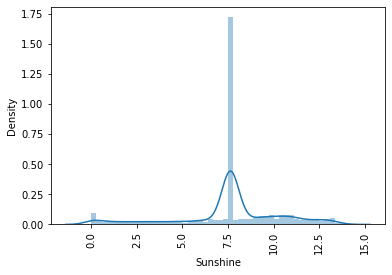

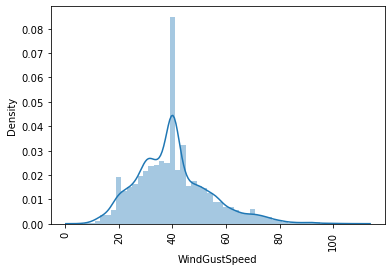

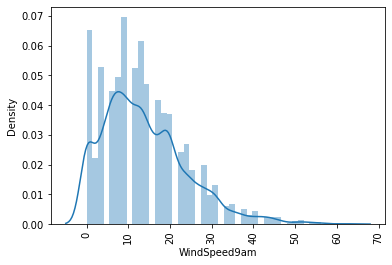

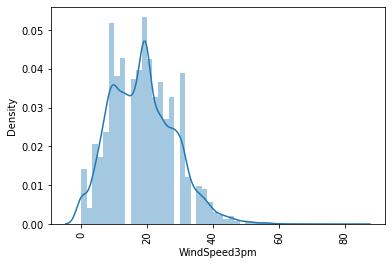

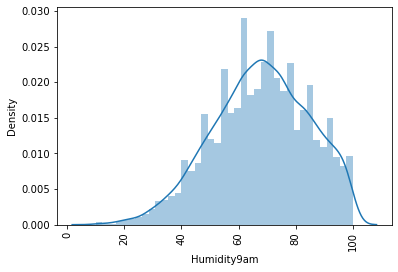

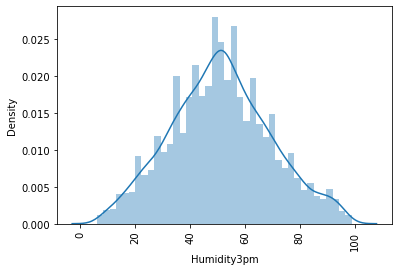

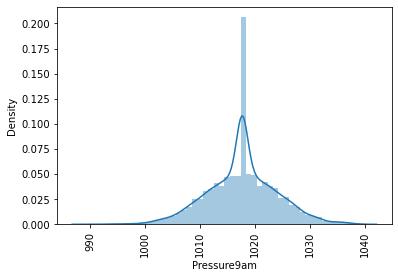

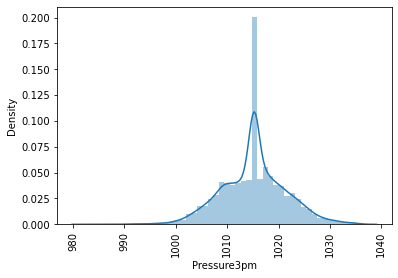

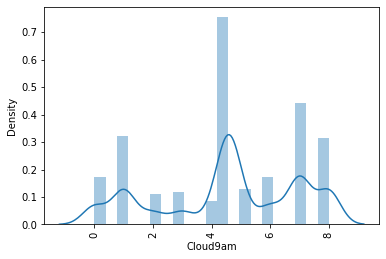

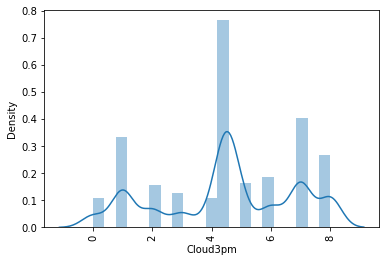

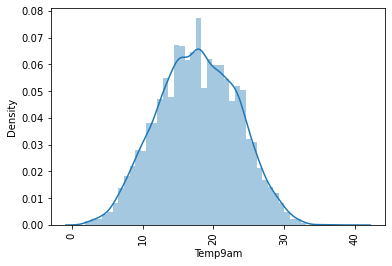

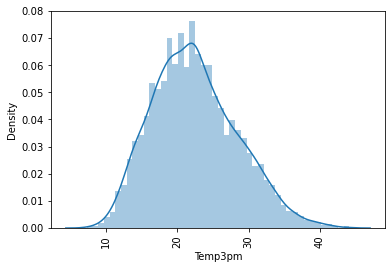

In [21]:
for i in num_columns:
    
    plt.xticks(rotation=90)
    sns.distplot(df[i],kde=True)
    plt.show()

The minimum and maximum temperature are evenly distributed among the places.

Highest rainfall recorded is between 0.1 to 10mm.

Highest evaporation rate recorded is between 0.1 to 15mm.

Nearly 7.5hrs of bright sunshine is seen throughout the day.

The speed of the strongest wind gust recorded is 40 -45 km/hr.

The highest wind speed both at 9am and 3pm is recorded at 10 -15 km/hr.

60% average humidity is recorded at both 9am and 3pm.

The cloud is evenly distributed both at 9am and 3pm.

An average of 20 - 25 degree C is recorded both at 9am and 3pm.



In [22]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

# Bivariate Analysis

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

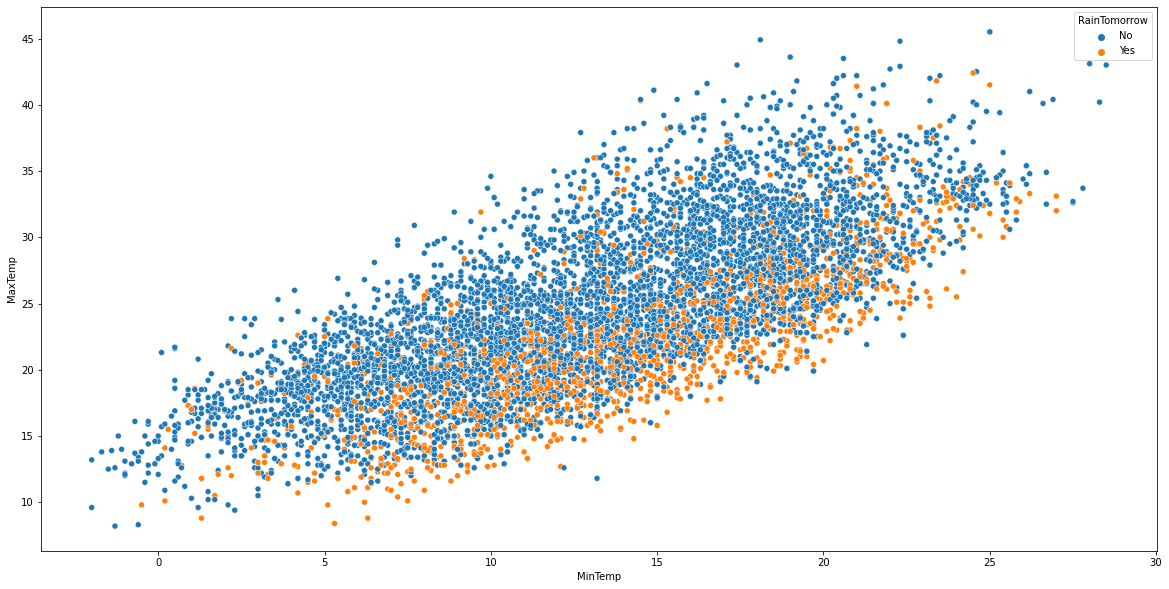

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['MinTemp'], y=df['MaxTemp'], hue= df['RainTomorrow'])

The possibility of NO rainfall is high with maximum temperature.

<AxesSubplot:xlabel='WindDir9am', ylabel='WindSpeed9am'>

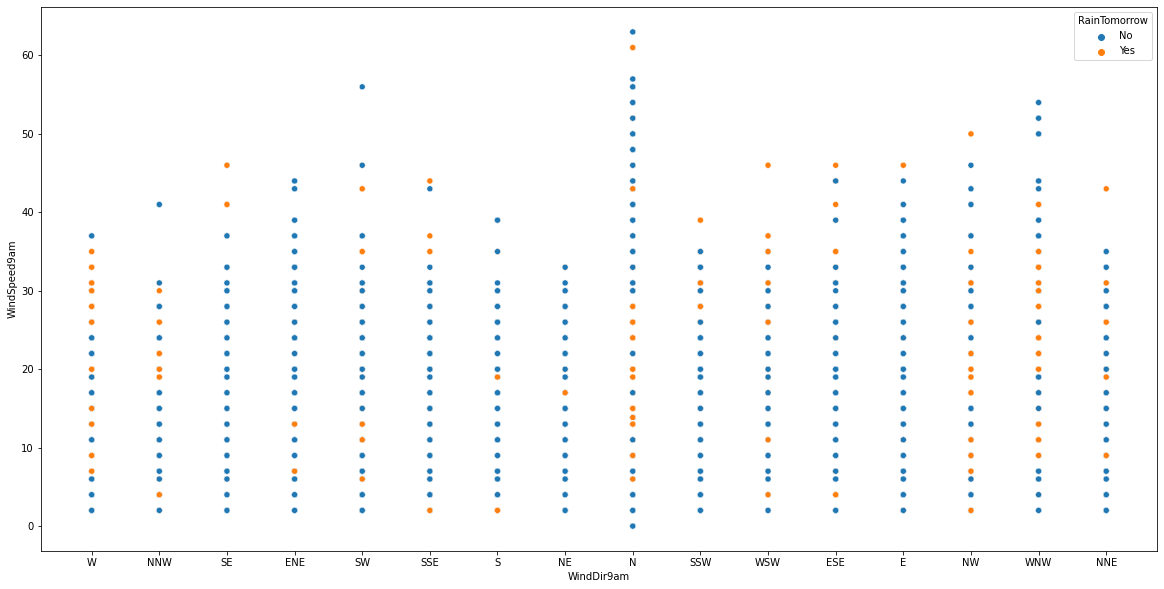

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['WindDir9am'], y=df['WindSpeed9am'], hue= df['RainTomorrow'])

If the speed of the wind is high, regardless of the direction then there is NO possibility of rain.

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

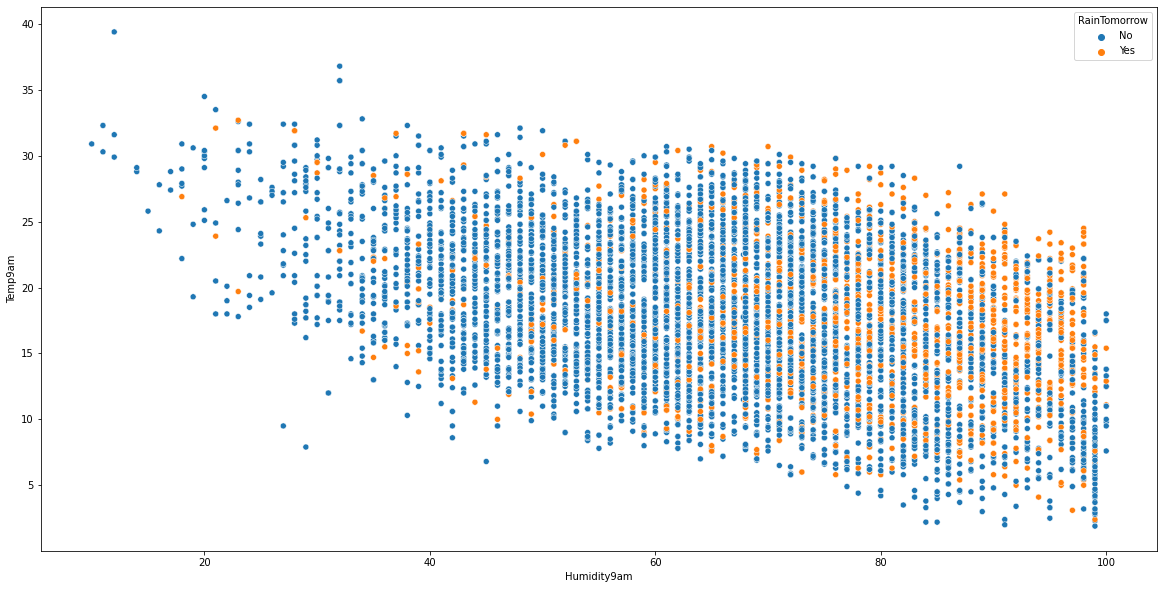

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['Humidity9am'], y=df['Temp9am'], hue= df['RainTomorrow'])

With high humidity and moderate temperature, the possibility of rain is high.

<AxesSubplot:xlabel='Month', ylabel='WindGustSpeed'>

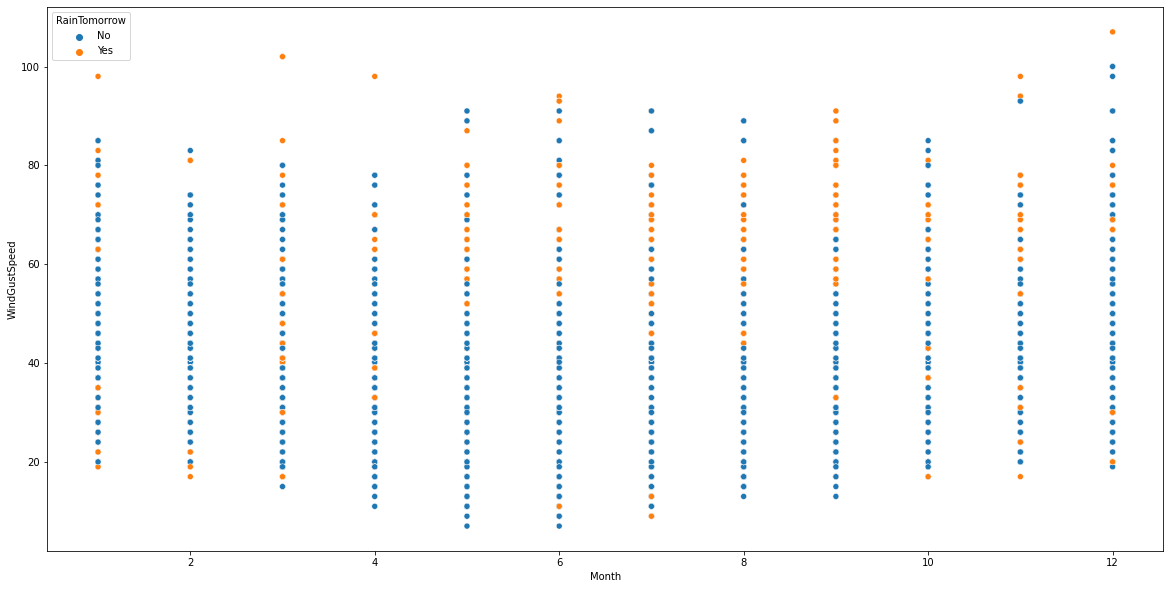

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['Month'], y=df['WindGustSpeed'], hue= df['RainTomorrow'])

The possibility of rain is high with high speed wind during months may to october.

<AxesSubplot:xlabel='Humidity9am', ylabel='Pressure9am'>

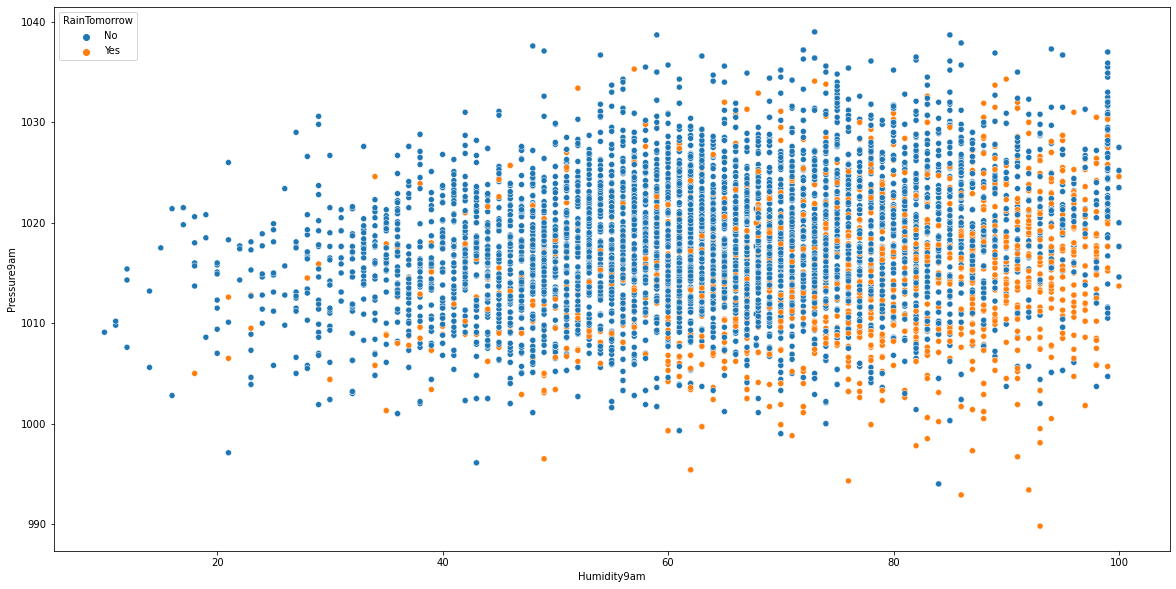

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(x= df['Humidity9am'], y=df['Pressure9am'], hue= df['RainTomorrow'])

With high humidity and moderate pressure, there are possibilities of rain

In [34]:
df.nunique()

Location          12
MinTemp          286
MaxTemp          332
Rainfall         251
Evaporation      117
Sunshine         141
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

# Encode The Categorical Data

In [36]:
LE= LabelEncoder()

In [37]:
cat_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [38]:
for i in cat_columns[1:]:
    df[i]= LE.fit_transform(df[i])

In [39]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


In [40]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

# Data Description

In [41]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320,15.741958,6.442136,2012.102433
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846,8.787354,3.437994,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000,16.000000,6.000000,2011.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


Many columns like rainfall, evaporation, Windgustspeed.... has outliers in it, as max values are way apart from 75th percentile

# Correlation

In [42]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,0.221378,0.231801,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,0.025399,0.094623,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,0.015683,0.034823,-0.088340
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,0.054272,0.047116,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,0.025973,0.068799,-0.010312,-0.012167,-0.136517,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,0.003089,0.029384,-0.005812


<AxesSubplot:>

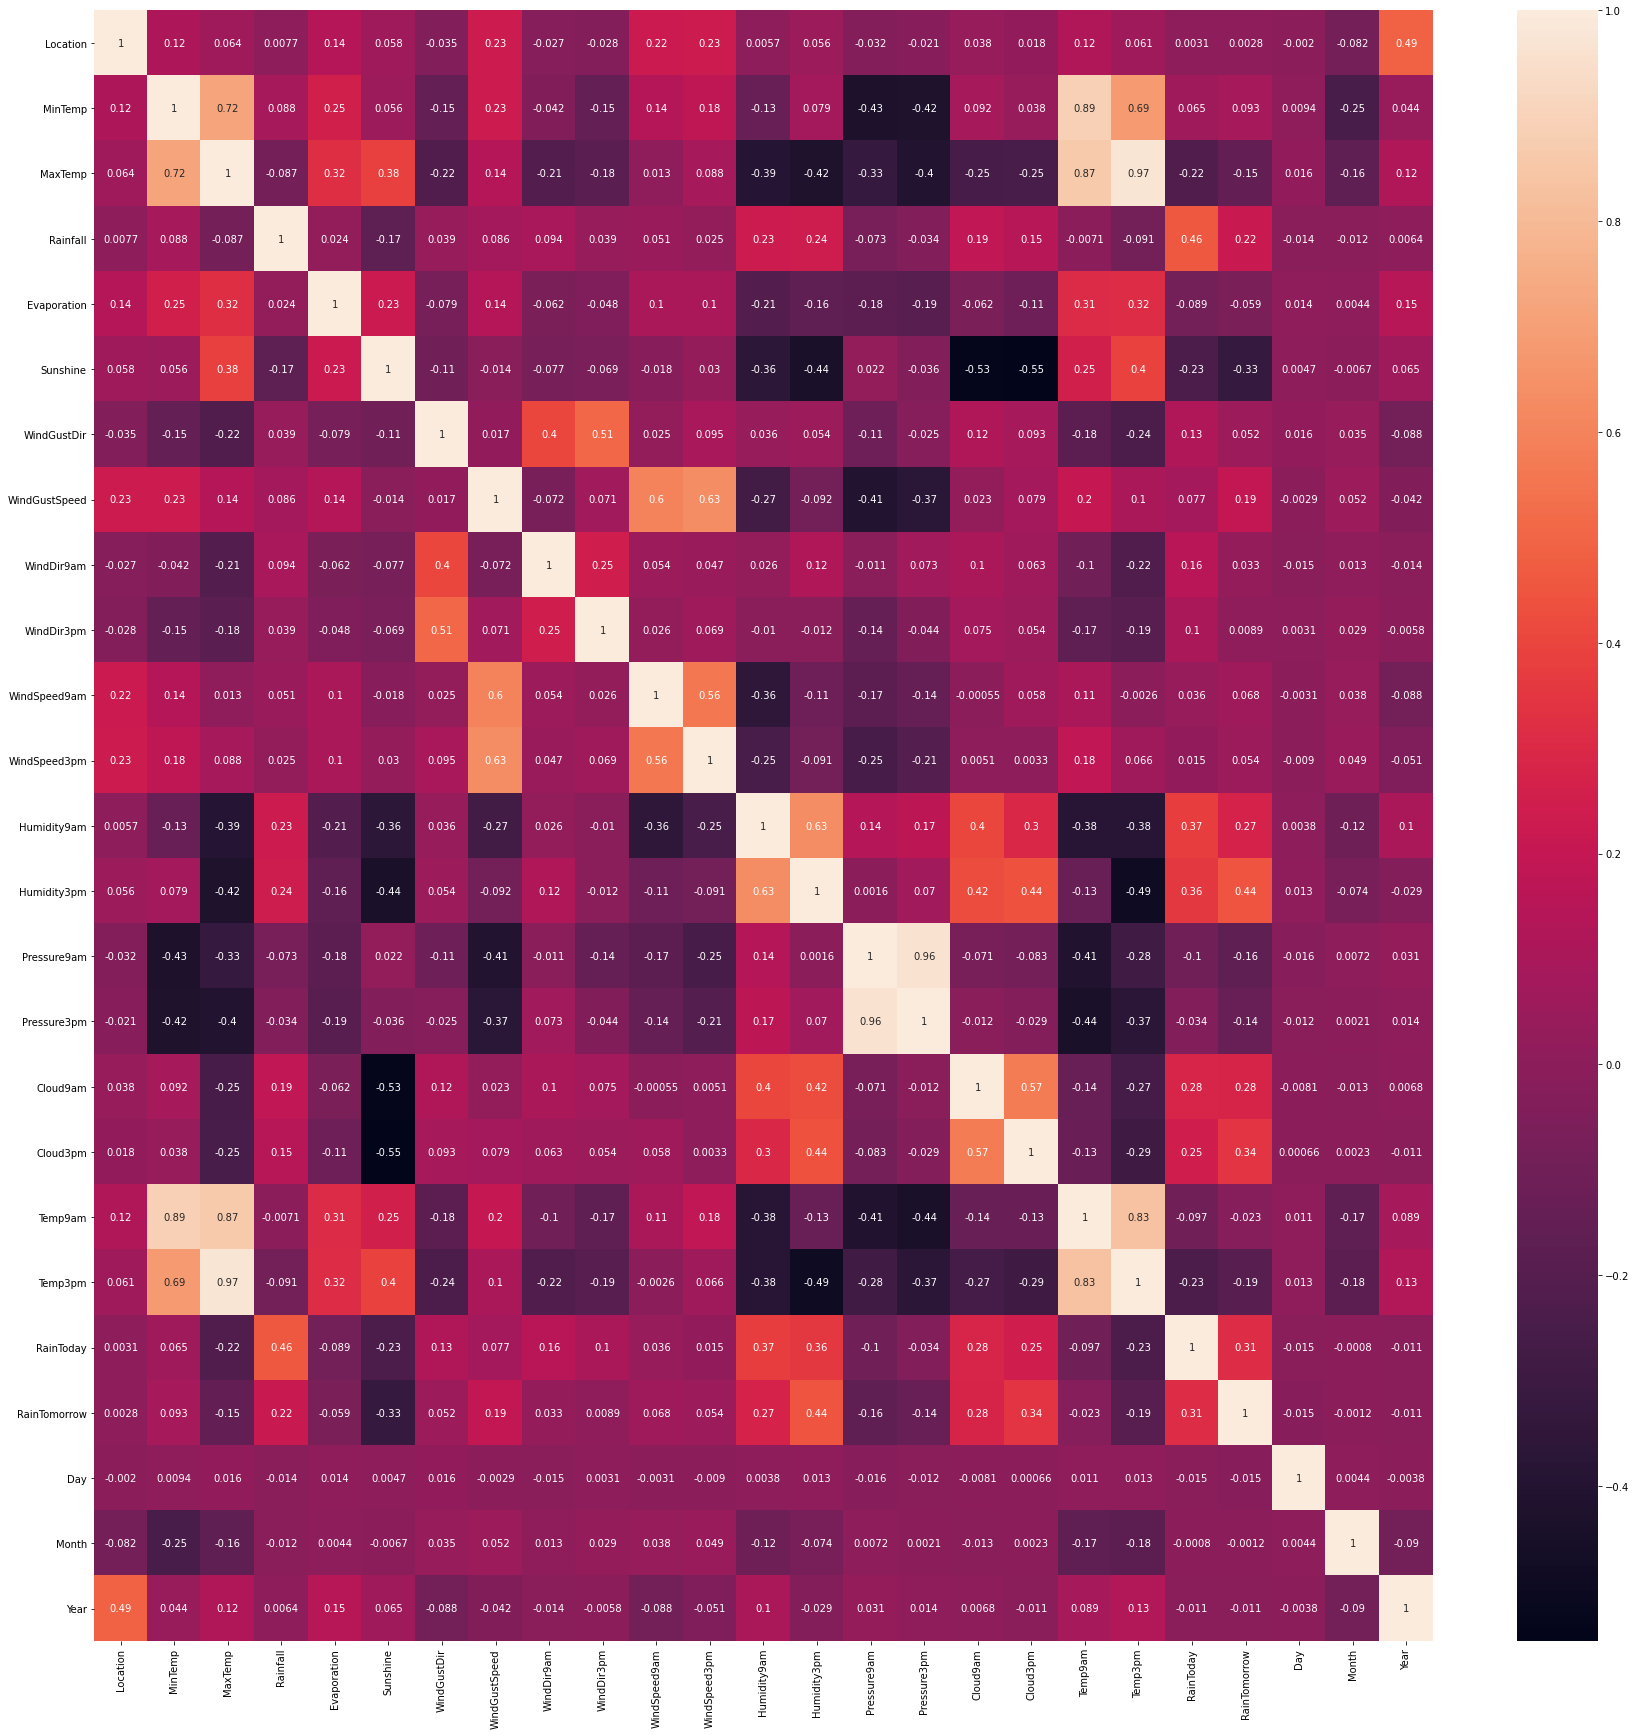

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

 Many columns have good correlation, but multicollinearity between columns are checked with VIF

# Check For Multi Collinearity- VIF

Target- RainTomorrow

In [44]:
df1=df.drop('RainTomorrow', axis=1)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [47]:
vif_fun()

,vif_factor,features
0,5.029753,Location
1,58.561162,MinTemp
2,428.564787,MaxTemp
3,1.411830,Rainfall
4,3.551552,Evaporation
5,15.181394,Sunshine
6,5.291925,WindGustDir
7,22.844220,WindGustSpeed
8,4.698134,WindDir9am
9,6.090537,WindDir3pm


Pressure column has multicollinearity, in which pressure9am has less contribution to target, so deleting it.

In [48]:
df1.drop(['Pressure9am'], axis=1, inplace=True)

In [49]:
vif_fun()

,vif_factor,features
0,5.027534,Location
1,57.364190,MinTemp
2,428.342499,MaxTemp
3,1.411599,Rainfall
4,3.540235,Evaporation
5,15.171329,Sunshine
6,5.259051,WindGustDir
7,22.716304,WindGustSpeed
8,4.633878,WindDir9am
9,5.772570,WindDir3pm


pressure3pm and year has collinearity, due to less contribution to target, dropping Pressure3pm

In [50]:
df1.drop(['Pressure3pm'], axis=1, inplace=True)

In [51]:
vif_fun()

,vif_factor,features
0,5.023489,Location
1,57.362656,MinTemp
2,426.869925,MaxTemp
3,1.410923,Rainfall
4,3.518541,Evaporation
5,15.135711,Sunshine
6,5.239837,WindGustDir
7,21.019167,WindGustSpeed
8,4.631609,WindDir9am
9,5.742532,WindDir3pm


Maxtemp and temp3pm also temp9am and year has high collinearity, dropping temp3pm and temp9am due to less contribution to target. 

In [52]:
df1.drop(['Temp3pm'], axis=1, inplace=True)

In [54]:
df1.drop(['Temp9am'], axis=1, inplace=True)

In [55]:
vif_fun()

,vif_factor,features
0,4.962613,Location
1,30.355732,MinTemp
2,84.814956,MaxTemp
3,1.406237,Rainfall
4,3.517124,Evaporation
5,15.108276,Sunshine
6,5.214959,WindGustDir
7,20.488796,WindGustSpeed
8,4.621384,WindDir9am
9,5.710224,WindDir3pm


Among year and maxtemp dropping year due to less contribution

In [56]:
df1.drop(['Year'], axis=1, inplace=True)

In [57]:
vif_fun()

,vif_factor,features
0,4.962160,Location
1,26.417947,MinTemp
2,54.734372,MaxTemp
3,1.398320,Rainfall
4,3.516696,Evaporation
5,13.417951,Sunshine
6,5.197720,WindGustDir
7,19.845019,WindGustSpeed
8,4.390507,WindDir9am
9,5.581499,WindDir3pm


Target- Rainfall

In [58]:
df2= df.drop('Rainfall', axis=1)

In [59]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df2.values,i) for i in range(df2.shape[1])]
    vif['features']= df2.columns
    return(vif)

In [60]:
vif_fun()

,vif_factor,features
0,5.048719,Location
1,58.595194,MinTemp
2,428.094729,MaxTemp
3,3.529723,Evaporation
4,15.284607,Sunshine
5,5.293516,WindGustDir
6,23.493286,WindGustSpeed
7,4.688421,WindDir9am
8,6.093178,WindDir3pm
9,5.875319,WindSpeed9am


Pressure column has multicollinearity, in which pressure9am has less contribution to target, so deleting it.

In [61]:
df2.drop(['Pressure9am'], axis=1, inplace=True)

In [62]:
vif_fun()

,vif_factor,features
0,5.047140,Location
1,57.430822,MinTemp
2,427.869873,MaxTemp
3,3.517933,Evaporation
4,15.270573,Sunshine
5,5.259942,WindGustDir
6,23.336020,WindGustSpeed
7,4.623740,WindDir9am
8,5.778001,WindDir3pm
9,5.871807,WindSpeed9am


pressure3pm and year has collinearity, due to less contribution to target, dropping Pressure3pm

In [63]:
df2.drop(['Pressure3pm'], axis=1, inplace=True)

In [64]:
vif_fun()

,vif_factor,features
0,5.040930,Location
1,57.430783,MinTemp
2,426.430234,MaxTemp
3,3.497471,Evaporation
4,15.247911,Sunshine
5,5.241981,WindGustDir
6,21.854935,WindGustSpeed
7,4.621412,WindDir9am
8,5.745929,WindDir3pm
9,5.834924,WindSpeed9am


Maxtemp and temp3pm also temp9am and year has high collinearity, dropping temp3pm and temp9am due to less contribution to target.

In [65]:
df2.drop(['Temp3pm', 'Temp9am'], axis=1, inplace=True)

In [66]:
vif_fun()

,vif_factor,features
0,4.981010,Location
1,30.455075,MinTemp
2,85.322972,MaxTemp
3,3.495966,Evaporation
4,15.222390,Sunshine
5,5.216045,WindGustDir
6,21.323870,WindGustSpeed
7,4.612220,WindDir9am
8,5.714586,WindDir3pm
9,5.765121,WindSpeed9am


Among year and maxtemp dropping maxtemp due to less contribution

In [67]:
df2.drop(['MaxTemp'], axis=1, inplace=True)

In [72]:
df1['RainTomorrow']= df['RainTomorrow']

In [73]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,Day,Month,RainTomorrow
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,8.000000,4.503183,0,1,12,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,4.566622,4.503183,0,2,12,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,4.566622,2.000000,0,3,12,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,4.566622,4.503183,0,4,12,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,5,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,4.566622,4.503183,0,21,6,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,4.566622,4.503183,0,22,6,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,4.566622,4.503183,0,23,6,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,3.000000,2.000000,0,24,6,0


In [74]:
df2['Rainfall']= df['Rainfall']

In [75]:
df2 

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Day,Month,Year,Rainfall
0,1,13.4,5.389395,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,8.000000,4.503183,0,0,1,12,2008,0.6
1,1,7.4,5.389395,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,4.566622,4.503183,0,0,2,12,2008,0.0
2,1,12.9,5.389395,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,4.566622,2.000000,0,0,3,12,2008,0.0
3,1,9.2,5.389395,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,4.566622,4.503183,0,0,4,12,2008,0.0
4,1,17.5,5.389395,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,0,5,12,2008,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,5.389395,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,4.566622,4.503183,0,0,21,6,2017,0.0
8421,9,3.6,5.389395,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,4.566622,4.503183,0,0,22,6,2017,0.0
8422,9,5.4,5.389395,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,4.566622,4.503183,0,0,23,6,2017,0.0
8423,9,7.8,5.389395,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,3.000000,2.000000,0,0,24,6,2017,0.0


# Remove Skewness

In [76]:
df1.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
MaxTemp           0.380654
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Month             0.039388
Day               0.004260
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

In [77]:
df1.drop(['RainTomorrow'], axis=1, inplace=True)

We can see certain columns with skewness above the limit of +/-0.5. We can handle them for numeric columns alone, as categorical columns have no impact on it

In [78]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [79]:
df1['RainTomorrow']= df['RainTomorrow']

In [80]:
df2.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
RainTomorrow      1.241588
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Year              0.418663
WindDir9am        0.172792
WindGustDir       0.119640
Humidity3pm       0.118281
Month             0.039388
Day               0.004260
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

In [81]:
df2.drop(['Rainfall'], axis=1, inplace=True)

In [82]:
from sklearn.preprocessing import power_transform
df2_new= power_transform(df2)

In [83]:
df2['Rainfall']= df['Rainfall']

# Check For Outliers

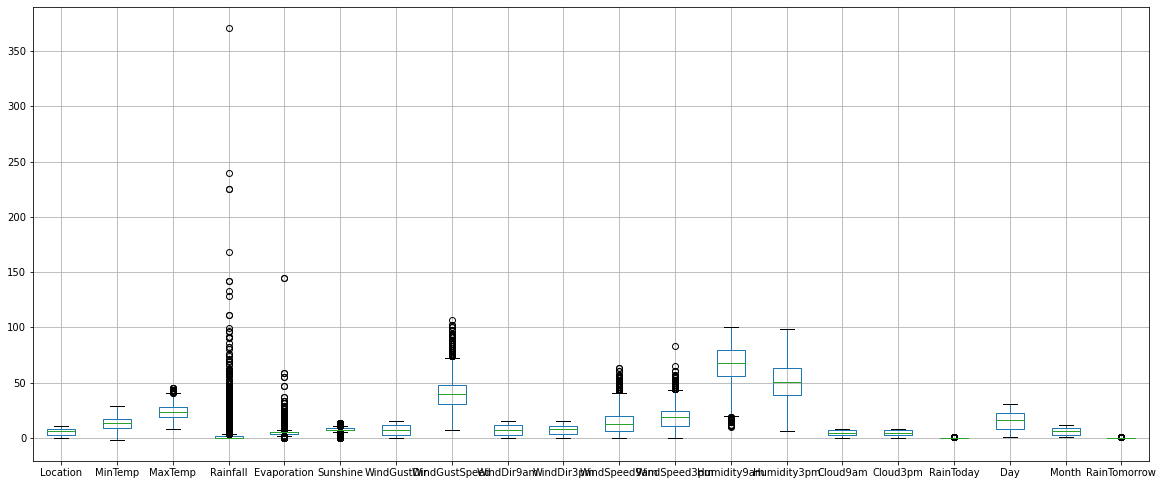

In [84]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There may be posibility of outliers in certain columns. we shall handle it.

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.51577598e+00, 3.84250100e-02, 1.57008852e-01, ...,
        1.67773291e+00, 1.61669646e+00, 5.56282121e-01],
       [1.51577598e+00, 1.07698898e+00, 2.02812062e-01, ...,
        1.56392626e+00, 1.61669646e+00, 5.56282121e-01],
       [1.51577598e+00, 5.45261556e-02, 3.00945038e-01, ...,
        1.45011961e+00, 1.61669646e+00, 5.56282121e-01],
       ...,
       [1.01389522e+00, 1.44879364e+00, 4.97210991e-01, ...,
        8.26013396e-01, 1.28610663e-01, 5.56282121e-01],
       [1.01389522e+00, 1.00262804e+00, 5.13566487e-01, ...,
        9.39820046e-01, 1.28610663e-01, 5.56282121e-01],
       [1.01389522e+00, 3.17278507e-01, 2.90531973e-15, ...,
        1.05362670e+00, 1.28610663e-01, 5.56282121e-01]])

In [86]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([  44,   52,   52,   60,   61,   62,   62,   68,  123,  267,  381,
        381,  407,  431,  462,  563,  699,  713,  770,  796,  797,  802,
        928,  935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138,
       1148, 1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357,
       1411, 1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661,
       1665, 1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028,
       2043, 2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231,
       2265, 2429, 2488, 2500, 2505, 2527, 2541, 2593, 2676, 2677, 2735,
       2827, 2835, 2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3066, 3067, 3067,
       3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3101,
       3141, 3150, 3153, 3157, 3164, 3172, 3172, 3178, 3185, 3206, 3212,
       3213, 3221, 3227, 3234, 3248, 3248, 3260, 3

In [87]:
df_new= df1[(z<3).all(axis=1)]

In [88]:
df_new.shape

(8047, 20)

In [89]:
df1.shape

(8425, 20)

In [90]:
#Loss
loss= (8425-8047)/ 8425*100
loss

4.4866468842729965

Nearly 5% of the data is lost as outliers.

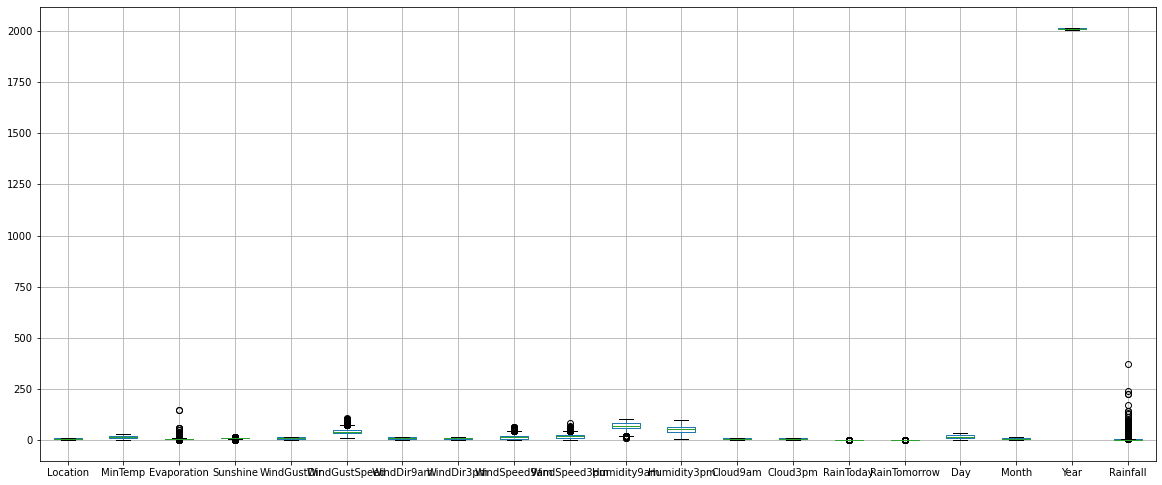

In [91]:
df2.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [92]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[1.51577598e+00, 3.84250100e-02, 2.30589346e-16, ...,
        1.61669646e+00, 1.65889601e+00, 2.13985662e-01],
       [1.51577598e+00, 1.07698898e+00, 2.30589346e-16, ...,
        1.61669646e+00, 1.65889601e+00, 2.72188947e-01],
       [1.51577598e+00, 5.45261556e-02, 2.30589346e-16, ...,
        1.61669646e+00, 1.65889601e+00, 2.72188947e-01],
       ...,
       [1.01389522e+00, 1.44879364e+00, 2.30589346e-16, ...,
        1.28610663e-01, 1.98042320e+00, 2.72188947e-01],
       [1.01389522e+00, 1.00262804e+00, 2.30589346e-16, ...,
        1.28610663e-01, 1.98042320e+00, 2.72188947e-01],
       [1.01389522e+00, 3.17278507e-01, 2.30589346e-16, ...,
        1.28610663e-01, 1.98042320e+00, 2.72188947e-01]])

In [93]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([  52,   52,   62,  123,  267,  381,  381,  431,  462,  563,  699,
        713,  770,  796,  797,  802,  928,  935,  949,  979,  980,  980,
        980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873,
       1898, 1903, 1945, 2016, 2028, 2043, 2063, 2074, 2108, 2116, 2186,
       2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2541,
       2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2863, 2869,
       2877, 2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911,
       2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003,
       3051, 3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089,
       3089, 3099, 3099, 3101, 3141, 3150, 3153, 3157, 3164, 3172, 3172,
       3178, 3185, 3206, 3212, 3213, 3221, 3227, 3234, 3248, 3248, 3260,
       3350, 3419, 3421, 3430, 3449, 3449, 3450, 3

In [94]:
df2_new= df2[(z<3).all(axis=1)]

In [95]:
df2_new.shape

(8062, 20)

In [96]:
df2.shape

(8425, 20)

In [97]:
#loss
loss=(8425-8062)/ 8425*100
loss

4.308605341246291

Nearly 4.5% of data is lost as outliers

# Target Variable- RainTomorrow

In [99]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [100]:
y.value_counts()

0    6208
1    1839
Name: RainTomorrow, dtype: int64

The target variable is highly imbalanced which may affect lead to biasing and low performance. So we shall balance it with SMOT

In [101]:
from imblearn.over_sampling import SMOTE

In [102]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [103]:
y1.value_counts()

0    6208
1    6208
Name: RainTomorrow, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Scaling of Features

In [104]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,Day,Month
0,-1.543391,0.013036,-0.034737,-0.389876,0.19229,0.182403,1.282189,0.245708,1.312997,1.487065,0.679317,0.610231,0.004742,-1.811235,1.313776,-0.207061,-0.595707,-1.685984,1.763905
1,-1.543391,-1.136425,0.340353,-0.499894,0.19229,0.182403,1.503909,0.245708,-0.269014,1.722646,-1.034441,0.396760,-1.659246,-1.653258,-0.166952,-0.207061,-0.595707,-1.570249,1.763905
2,-1.543391,-0.082752,0.442651,-0.499894,0.19229,0.182403,1.725628,0.396030,1.312997,1.722646,0.572208,0.823702,-2.029021,-1.389962,-0.166952,-1.341921,-0.595707,-1.454515,1.763905
3,-1.543391,-0.791586,0.834791,-0.499894,0.19229,0.182403,-0.713284,-1.257505,0.408991,-1.811064,-0.284672,-0.990799,-1.597616,-2.127190,-0.166952,-0.207061,-0.595707,-1.338780,1.763905
4,-1.543391,0.798502,1.567922,-0.316531,0.19229,0.182403,1.282189,0.020226,-1.399022,-0.162000,-0.713112,0.183290,0.682663,-1.231985,0.882502,1.378280,-0.595707,-1.223045,1.763905


# Train The Model

In [105]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [106]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.95 on Random_state 8


# To Find the Best Cross Validation Score

In [107]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [108]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [109]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.715931056701031 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 3 the cv score is 0.6878294592381474 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 4 the cv score is 0.7051385309278351 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 5 the cv score is 0.7079619998923435 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 6 the cv score is 0.7007943735022559 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 7 the cv score is 0.7199719727117732 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 0.65


At cross fold 8 the cv score is 0.7259987113402062 and accuracy score for training is 0.7633914165859955 and the accuracy for testing is 

Random_state= 8, CV score is best with cv=8. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [110]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=8)

# Logistic Regression

In [111]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[ 9  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Score: 0.7629073894804775
Acc_score: 0.95


In [112]:
cv_score=cross_val_score(lg,x1,y1, cv=8)
print('Cross Validation Score of LogisticRegression is:', cv_score.mean())

Cross Validation Score of LogisticRegression is: 0.7259987113402062


In [113]:
diff= 0.95-0.725
diff

0.22499999999999998

# GaussianNB

In [114]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[8 2]
 [2 8]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20

Acc_score: 0.8


In [115]:
cv_score=cross_val_score(gnb,x1,y1, cv=8)
print('Cross Validation Score of GaussianNB is:', cv_score.mean())

Cross Validation Score of GaussianNB is: 0.7134342783505154


In [116]:
diff= 0.8- 0.7134
diff

0.08660000000000001

# DecisionTreeClassifier

In [117]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[10  1]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [118]:
cv_score=cross_val_score(dtc,x1,y1, cv=8)
print('Cross Validation Score of DecisionTreeClassifier is:', cv_score.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.8208762886597938


In [119]:
diff= 0.95- 0.8208
diff

0.12919999999999998

# RandomForestClassifier

In [120]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[10  1]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [121]:
cv_score=cross_val_score(rf,x1,y1, cv=8)
print('Cross Validation Score of RandomForestClassifier is:', cv_score.mean())

Cross Validation Score of RandomForestClassifier is: 0.8743556701030928


In [122]:
diff= 0.95- 0.8743
diff

0.07569999999999999

# SVC

In [123]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[10  1]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [124]:
cv_score=cross_val_score(svc,x1,y1, cv=8)
print('Cross Validation Score of SVC is:', cv_score.mean())

Cross Validation Score of SVC is: 0.7751288659793814


In [125]:
diff= 0.95-0.7751
diff

0.17489999999999994

# KNN

In [126]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[ 9  0]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [127]:
cv_score=cross_val_score(knn,x1,y1, cv=8)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.7761759020618557


In [128]:
diff= 0.95-0.7761
diff

0.17389999999999994

LinearRegression - 0.2249

GaussianNB- 0.0866

DecisionTreeClassifier- 0.1291

RandomForestClassifier- 0.0756

SVC- 0.1748

KNN- 0.1738

The difference between accuracy score and Cv score is less with RandomForestClassifier which reduces the overfitting of the model. So we shall improve the performance by tuning the Hyper Parameters with GridSearchCV

# HyperParameter Tuning With GridSearchCV

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
RandomForestClassifier()

RandomForestClassifier()

In [131]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [132]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=8, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [133]:
GCV.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=3,
                       min_samples_split=5)

In [134]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.8

In [141]:
rf=RandomForestClassifier(criterion='gini',
                          max_depth=6,
                          max_features='log2',
                          min_samples_leaf= 3,
                          min_samples_split=5)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[8 2]
 [2 8]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20

Acc_score: 0.8


After implementing HyperParameterTuning, the accuracy is 80% which indicates the model is working well with the dataset without overfitting.

# ROC Curve

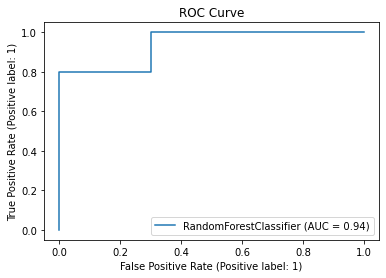

In [136]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

The ROC curve shows the Area Under The Curve is 94%

# Save The Model

In [137]:
import pickle
filename= 'RainTomorrow.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [138]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


The predicted results are 80% nearly equal to the actual results. The model gave good performance.

# Target Variable- Rainfall

In [142]:
x= df2_new.iloc[:,0:-1]
y=df2_new.iloc[:,-1]

In [143]:
y.value_counts()

0.000000     5127
0.200000      394
2.805913      232
0.400000      176
0.600000      115
             ... 
27.000000       1
24.800000       1
18.000000       1
28.000000       1
21.600000       1
Name: Rainfall, Length: 172, dtype: int64

The target column contains more values as '0'. since it measures the amount of rainfall in a particular area, we are not replacing it with any mean or median.

In [145]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

The target variable is of continous type, so we shall use regression models.

In [155]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

# Check the best Random State

# Linear Regression

In [147]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.9159310618243562 on Random_state 88


# To Find the Best Cross Validation Score

In [148]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [149]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [150]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.47790015425111704 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 3 the cv score is 0.4801242025155332 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 4 the cv score is 0.4748221320458799 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 5 the cv score is 0.4825323468056175 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 6 the cv score is 0.4797559965487901 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 7 the cv score is 0.4793223464877131 and accuracy score for training is 0.48871081230516655 and the accuracy for testing is 0.5736798780836371


At cross fold 8 the cv score is 0.48056013691

Random_state= 88, CV score is best with cv=5. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=88)

In [152]:
# Linear Regression Model

lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predlr)))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.9159310618243562
RMSE= 0.6252280015318183
MBE= 0.47015029536593317


In [153]:
cv_score=cross_val_score(lr,x,y, cv=5)
print('Cross Validation Score of LinearRegression is:', cv_score.mean())

Cross Validation Score of LinearRegression is: 0.4825323468056175


In [154]:
diff= 0.9159-0.4825
diff

0.43340000000000006

In [156]:
# Ridge Regression

rd=Ridge(alpha=1e-2, normalize=True)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('R2=', r2_score(ytest,predrd))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predrd)))
print('MBE=', mean_absolute_error(ytest,predrd))


R2= 0.914572983451598
RMSE= 0.6302578429285912
MBE= 0.47616936985103964


In [157]:
cv_score=cross_val_score(rd,x,y, cv=5)
print('Cross Validation Score of RidgeRegression is:', cv_score.mean())

Cross Validation Score of RidgeRegression is: 0.48257382874858157


In [158]:
diff= 0.9145- 0.4761
diff

0.43839999999999996

In [159]:
# Lasso Regression

ls=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predls)))
print('MBE=', mean_absolute_error(ytest,predls))


R2= 0.90336956878653
RMSE= 0.670312931651131
MBE= 0.6508943728108314


In [160]:
cv_score=cross_val_score(ls,x,y, cv=5)
print('Cross Validation Score of LassoRegression is:', cv_score.mean())

Cross Validation Score of LassoRegression is: 0.4459989411964173


In [161]:
diff= 0.9033- 0.4459
diff

0.4574

In [167]:
#SVR

svc=SVR()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root mean_squared_error 0.8188396612879809
mean_absolute_error: 0.3501720314137765
Score: 0.46830488602051235
r2_score: 0.6759869031996076


In [163]:
cv_score=cross_val_score(svc,x,y, cv=5)
print('Cross Validation Score of SVR is:', cv_score.mean())

Cross Validation Score of SVR is: 0.4001252124576233


In [164]:
diff= 0.6717- 0.4001
diff

0.27159999999999995

In [166]:
# Decision Tree Regressor

dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
root_mean_squared_error 1.0448241287400926
mean_absolute_error: 0.37029566279780235
r2_score: 0.8563138683049849


In [168]:
cv_score=cross_val_score(dtc,x,y, cv=5)
print('Cross Validation Score of DecisionTreeRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.19344874545586904


In [169]:
diff= 0.8563- 0.1934
diff

0.6628999999999999

In [171]:
# Random Forest Regressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 0.8876474141966174
mean_absolute_error: 0.33348869883934024
Rf Score 0.9533064005788081
r2_score: 0.8927027952106625


In [172]:
cv_score=cross_val_score(rf,x,y, cv=5)
print('Cross Validation Score of RandomForestRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.5758335640300223


In [173]:
diff= 0.8927- 0.5758
diff

0.31690000000000007

In [174]:
# K Neighbors Regressor

knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

root mean_squared_error 1.60597633855546
mean_absolute_error: 0.562
Rf Score 0.6826437207987708
r2_score: 0.8058477089832432


In [175]:
cv_score=cross_val_score(knn,x,y, cv=5)
print('Cross Validation Score of KNeighborsRegressor is:', cv_score.mean())

Cross Validation Score of KNeighborsRegressor is: 0.41845590884217865


In [176]:
diff= 0.8058-0.4184
diff

0.38739999999999997

LinearRegression - 0.4334

Lasso- 0.4574

Ridge- 0.4383

DecisionTreeRegressor- 0.6627

RandomForestRegressor- 0.3169

SVR- 0.2715

KNN- 0.3878

The difference between accuracy score and Cv score is less with RandomForestRegressor which reduces the overfitting of the model. So we shall improve the performance by tuning the Hyper Parameters with GridSearchCV

# HyperParameter Tuning With GridSearchCV

In [180]:
RandomForestRegressor()

RandomForestRegressor()

In [181]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["squared_error", "absolute_error", "poisson"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [182]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=5, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [183]:
GCV.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_split=3)

In [184]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.8274417678933383

In [196]:
rf=RandomForestRegressor(max_depth=6, 
                         min_samples_split=3,
                         min_samples_leaf=1,
                         max_features= 'auto',
                         criterion = 'poisson')
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 0.3625900826160386
mean_absolute_error: 0.25703598327900024
Rf Score 0.504661530837764
r2_score: 0.9742170313536576


After tuning the parameters, r2 score is improved to 97%, which means the model is performing well with the dataset without the problem of underfitting.

# Save The Model

In [197]:
import pickle
filename= 'Rainfall.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [198]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1.0,0.162557
1,0.0,0.162557
2,0.0,0.162557
3,0.0,0.162557
4,0.0,0.154649
5,0.0,0.162557
6,0.1,0.162557
7,0.0,0.162557
8,0.0,0.153197
9,0.0,0.162557


The Predicted results are nearly 95% equal to the original values, the amount of rainfall is nearly equal to the original values, which means the model is working well with the dataset